<div style="text-align: center; color: #345; padding-top: 10px;">
<h1 style="background-color: skyblue; font-family: newtimeroman; font-size: 220%; text-align: center;"><span style="color: #000000;">Deep Learning - Predicting Loan Defaults </span><span style="color: #000000;"><br></br>
    <img src="https://mma.prnewswire.com/media/76307/lending_club_logo.jpg?w=200"/><span style="color: #0000ff;"></h1>
</div>

## Data
Data contains 2 sets for data for rejected and accepted loans, from the Lending club, between 2007 to 2018 Quarter 4. \
We will look at the accepted loans and only a subset of the columns (see list below)


## Business summary
Can we predict if a given borrower will default on their loan payments using the historical data provided. i.e. will the loan be ***Charged-off*** or set to ***Default*** status

## Goal
To develop a classification model that predicts the **"loan status"** of a loan 

Description of the columns used in prediction: \
**Note** with over 150 columns in this dataset, only the below will be used

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>16</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>17</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>18</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>19</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>20</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>22</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>23</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>24</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>25</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>26</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

We will need to check the GPU (or TPU) resources, because we may need it on some of the trainings of this notebook. 

In [ ]:
# Check GPU INFO. It is better to do the training with a GPU!

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Mon Dec 13 22:44:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Libraries

In [ ]:
#File handling
import os

#EDA 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#Imputation 
from sklearn.impute import SimpleImputer

#split

from sklearn.model_selection import train_test_split

#Preprocessing

from sklearn.preprocessing import MinMaxScaler

# Deep Learning 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation

!pip install scikit-optimize
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,confusion_matrix,roc_curve

     |████████████████████████████████| 100 kB 3.7 MB/s 


In [ ]:
#Define theme for matplotlib and seaborn to ensure consistency
sns.set_theme()

# Decompress the Data

Our data is stored in a drive. If the data has already been extracted from the gzip file, only the first part of the code below is executed. If not, this may take a few minutes, due to the size of the data. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
################
#You may need to change the data directory according to your drive folder. 
################

data_dir='/content/drive/MyDrive/IntrotoDS2021'

print("******")

lending_path = data_dir + '/accepted_2007_to_2018Q4.csv'

#If the csv file has not already been ungzip it may take some minutes.  

if not os.path.exists(lending_path):
    # Ungzip
    df = pd.read_csv(data_dir + '/accepted_2007_to_2018Q4.csv.gz', compression='gzip')
    df.to_csv(lending_path,index=False)
    print("Finished decompression")

print("csv ready.\n\n******")


******
csv ready.

******


#Description of the data to consult

We define a function that retrieves the description of the features in the dataset. 

In [ ]:
print("******")
data_info = pd.read_csv(data_dir +'/lending_club_info.csv',index_col='LoanStatNew')

def feat_info(col_name):
    info = data_info.loc[col_name]['Description']
    print(f"{col_name}: {info}")

#Examples
feat_info('revol_util')
feat_info('mort_acc')

******
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
mort_acc: Number of mortgage accounts.


# Read Data and review

In [ ]:
columns = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                          'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
                          'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',"addr_state",
                          'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
                          'revol_util', 'total_acc', 'initial_list_status', 'application_type',
                          'mort_acc', 'pub_rec_bankruptcies']

df = pd.read_csv(lending_path,usecols=columns)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,PA,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,SD,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,IL,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,NJ,17.06,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,PA,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


In [ ]:
df.shape

(2260701, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  addr_state            object 
 16  dti                   float64
 17  earliest_cr_line      object 
 18  open_acc              float64
 19  pub_rec               float64
 20  revol_bal             float64
 21  revol_util            float64
 22  total_acc             float64
 23  initial

In [ ]:
#target analysis
df["loan_status"].value_counts(dropna = False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

note the null values in target 

# Target Preprocessing
Looking at the target there are multiple categories. \
For our analysis we want to define a Binary classification of ***Default vs Paid***

In [ ]:
replace_status = {"Fully Paid":"Paid",
             "Current": "Paid",
             "Charged Off": "Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Charged Off":"Default",
              "Does not meet the credit policy. Status:Fully Paid":"Paid",
              "Late (31-120 days)":"Late",
              "Late (16-30 days)":"Late",
              "In Grace Period":"Late",
              "Default":"Default"
             }

In [ ]:
df["loan_status"] = df["loan_status"].replace(replace_status)

We will drop everything NOT ***Default or Paid*** i.e. null and Late \
In another notebook we can investigate how ***Late*** payments affect ***Default*** and look at imputing the null values

In [ ]:
# Keep Default or Paid loans only
df = df[ (df["loan_status"]== "Paid") | (df["loan_status"]== "Default")]

In [ ]:
df["loan_status"].value_counts(dropna= False)

Paid       1957056
Default     269360
Name: loan_status, dtype: int64

# Exploratory Data Analysis
1. individual column and data type investigation 
1. correlation analysis

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,2226416.0,15014.086889,9177.770847,500.00,8000.00,12800.00,20000.00,4.000000e+04
int_rate,2226416.0,13.054793,4.814616,5.31,9.49,12.62,15.88,3.099000e+01
installment,2226416.0,444.870133,266.732332,4.93,251.36,377.37,591.02,1.719830e+03
annual_inc,2226412.0,77986.903246,113094.663725,0.00,46000.00,65000.00,93000.00,1.100000e+08
dti,2224743.0,18.803585,14.128467,-1.00,11.89,17.82,24.47,9.990000e+02
open_acc,2226387.0,11.611802,5.636687,0.00,8.00,11.00,14.00,1.010000e+02
pub_rec,2226387.0,0.197034,0.568649,0.00,0.00,0.00,0.00,8.600000e+01
revol_bal,2226416.0,16676.424943,22979.604990,0.00,5958.00,11333.00,20265.00,2.904836e+06
revol_util,2224652.0,50.334659,24.708385,0.00,31.50,50.30,69.40,8.923000e+02
total_acc,2226387.0,24.177867,11.983757,1.00,15.00,22.00,31.00,1.760000e+02


In [ ]:
df.shape

(2226416, 27)

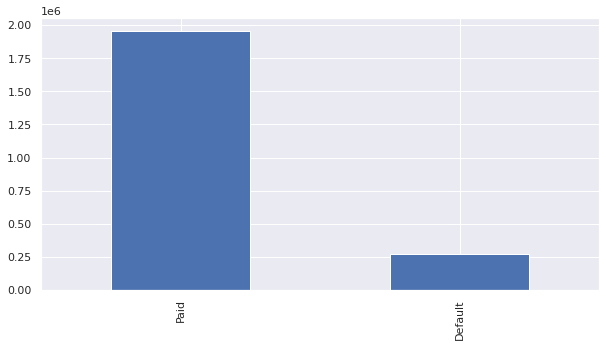

In [ ]:
#Target analysis
df["loan_status"].value_counts(dropna = False).plot(kind = "bar",figsize = (10,5))

***Note*** Very imbalanced data set \
***NB*** for determining the type of metric used in prediction i.e. accuracy will not work 

#DANIEL COMMENT

***I LIKE THE NEXT VISUALIZATION A LITTLE MORE, BUT IS ESSENTIALLY THE SAME. YOU CHOOSE.***

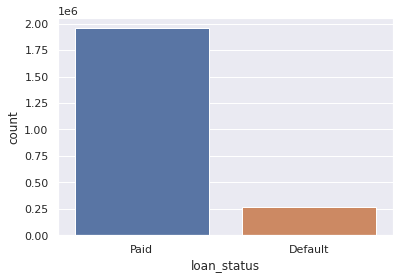

In [ ]:
sns.countplot(x='loan_status',data=df)

#END COMMENT

### Non-numeric analysis

In [ ]:
# all object type features
df.describe( include= ["object"]).transpose()

,count,unique,top,freq
term,2226416,2,36 months,1589901
grade,2226416,7,B,656005
sub_grade,2226416,35,C1,143681
emp_title,2062642,507786,Teacher,38293
emp_length,2082396,11,10+ years,737403
home_ownership,2226416,6,MORTGAGE,1096160
verification_status,2226416,3,Source Verified,871779
issue_d,2226416,139,Mar-2016,61109
loan_status,2226416,2,Paid,1957056
purpose,2226416,14,debt_consolidation,1257882


In [ ]:
def create_countplot(axes, x_val,order_val, title, rotation="n"):
    sns.countplot(ax= axes, data=df, x=x_val, order = order_val.value_counts(dropna= False).index,hue = "loan_status")
    axes.set_title(title)
    if rotation =="y":
        axes.set_xticklabels(list(order_val.unique()), rotation=90)

In [ ]:
#If some of the cells below show error because of the visualization run this cell to check 
#in your version of colab which ones are available

plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

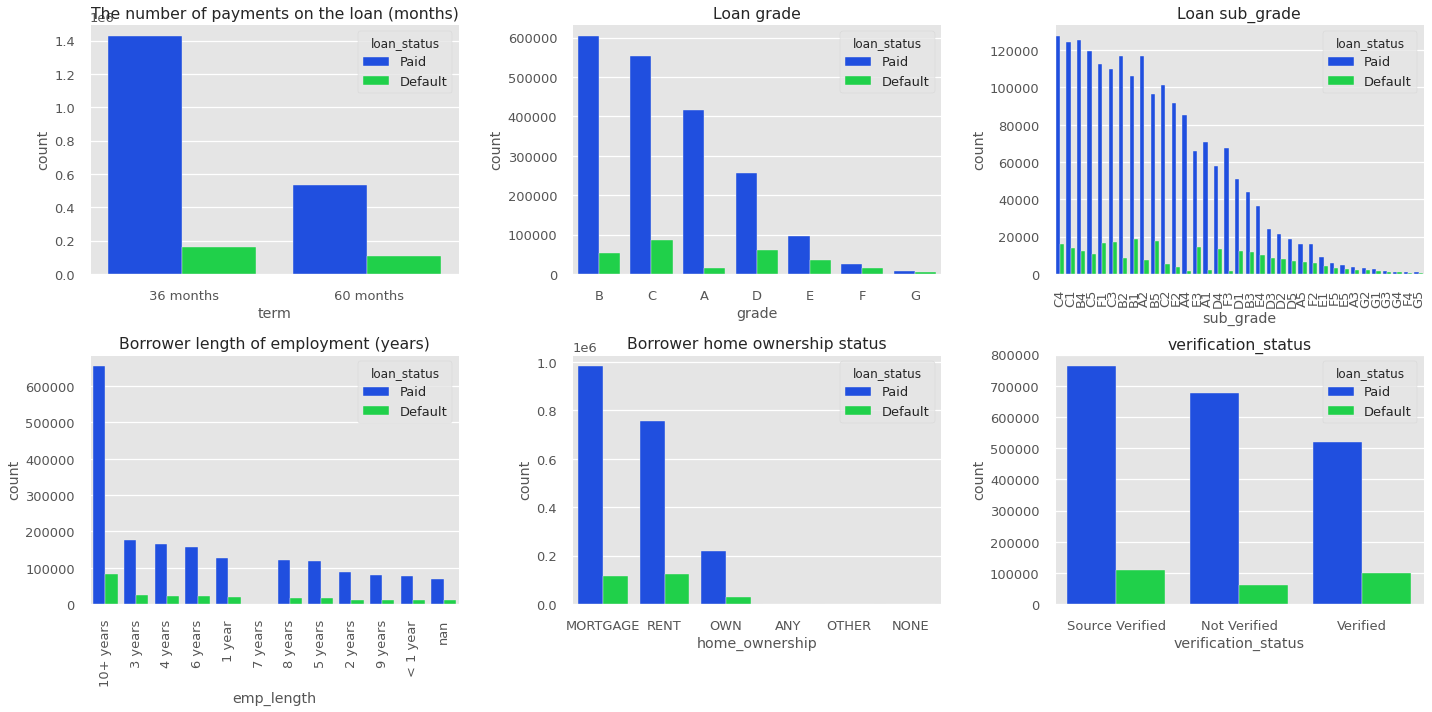

In [ ]:
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    fig, ax = plt.subplots(2,3, figsize= (20,10))

    create_countplot(ax[0,0],'term', df["term"],"The number of payments on the loan (months)" )

    create_countplot(ax[0,1],'grade', df["grade"],"Loan grade")

    create_countplot(ax[0,2],'sub_grade', df["sub_grade"],"Loan sub_grade","y")

    create_countplot(ax[1,0],'emp_length', df["emp_length"],"Borrower length of employment (years)", "y" )

    create_countplot(ax[1,1],'home_ownership', df["home_ownership"],"Borrower home ownership status" )

    create_countplot(ax[1,2],'verification_status', df["verification_status"],"verification_status" )


    plt.tight_layout()
    plt.show()

#DANIEL COMMENT

***I THINK WE SHOULD IMPROVE VISUALIZATIONS, SINCE THESE ARE WHAT PROFESSORS ARE GOING TO SEE IN THE PRESENTATION. I AM GIVING AN EXAMPLE FOR THE THIRD-ONE***

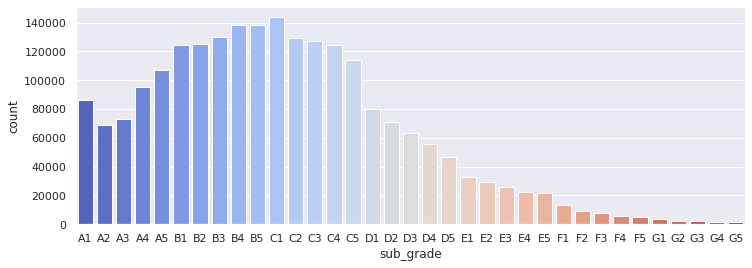

In [ ]:
#JOINED

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

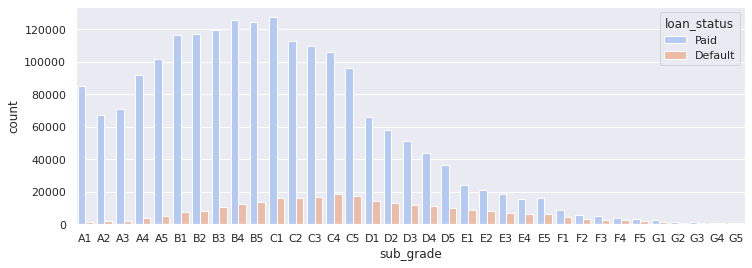

In [ ]:
#SEPARATED

plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

Note that it looks like F and G subgrades don't get paid back that often. It may be interesting to isolate those and recreate the countplot just for those subgrades.

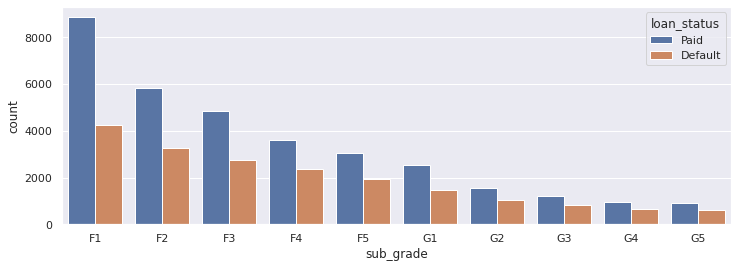

In [ ]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

#END COMMENT

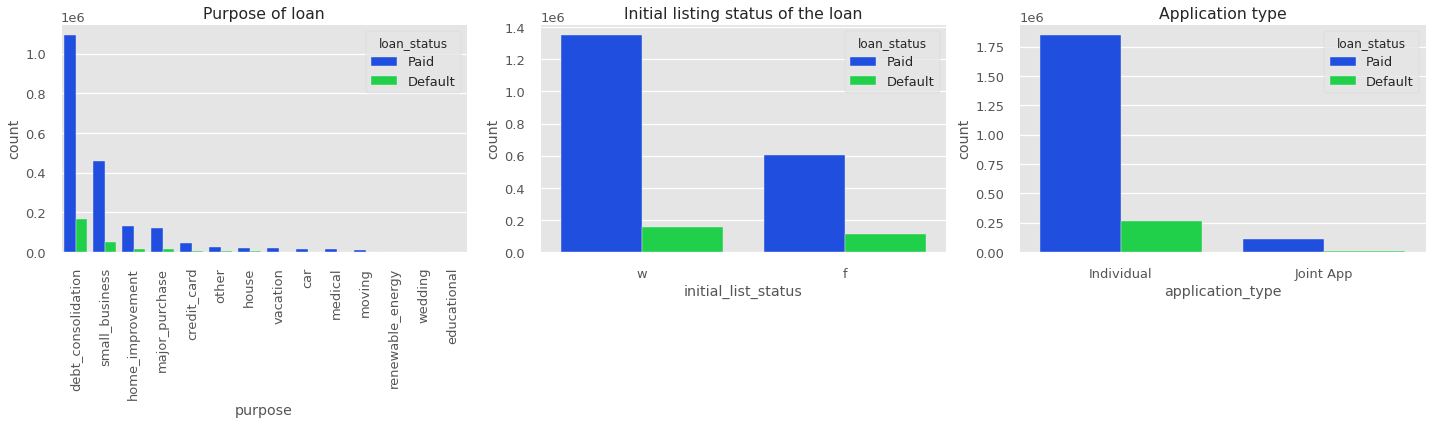

In [ ]:
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    fig, ax = plt.subplots(1,3, figsize= (20,6))

    create_countplot(ax[0],'purpose', df["purpose"],"Purpose of loan" ,"y")
    create_countplot(ax[1],'initial_list_status', df["initial_list_status"],"Initial listing status of the loan" )
    create_countplot(ax[2],'application_type', df["application_type"],"Application type" )



    plt.tight_layout()
    plt.show()

In [ ]:
## too many unique titles to plot 
df["emp_title"].value_counts(dropna= False)

NaN                   163774
Teacher                38293
Manager                33693
Owner                  21394
Registered Nurse       15622
                       ...  
Metal Production           1
Broadview Security         1
Pack                       1
daycare lead               1
Sprague Energy             1
Name: emp_title, Length: 507787, dtype: int64

In [ ]:
df[["title","purpose"]]

,title,purpose
0,Debt consolidation,debt_consolidation
1,Business,small_business
2,NaN,home_improvement
3,Debt consolidation,debt_consolidation
4,Major purchase,major_purchase
...,...,...
2260694,Home improvement,home_improvement
2260695,Debt consolidation,debt_consolidation
2260696,NaN,debt_consolidation
2260697,Debt consolidation,debt_consolidation


Puropose and Title are essentially duplicates with Purpose being more descriptive \
As such we can drop Title 

### Date Analysis

In [ ]:
#convert to date 
df["issue_d"] = pd.to_datetime(df["issue_d"])
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"])

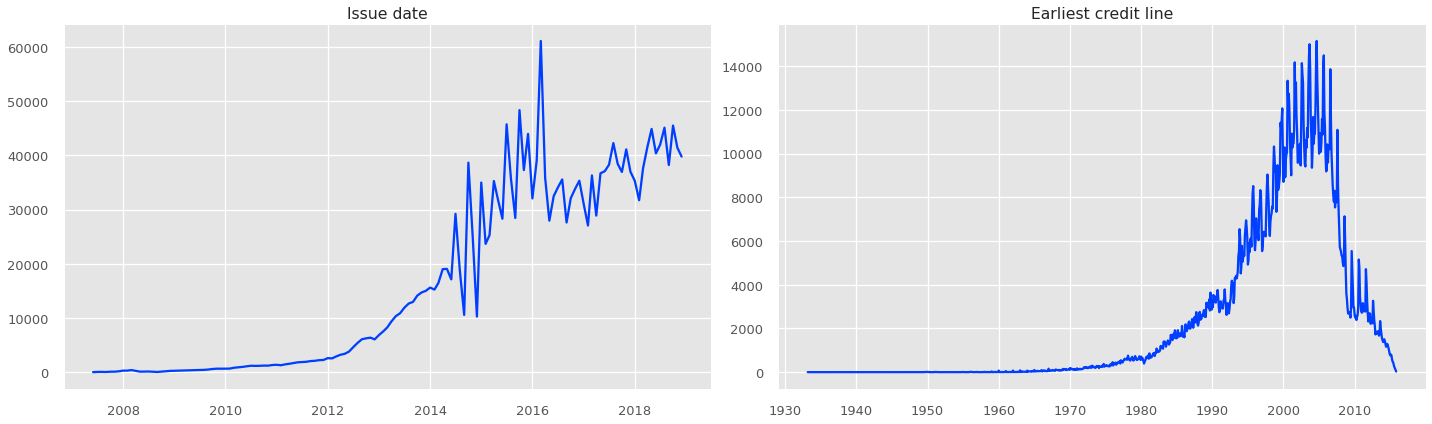

In [ ]:
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):    
    fig, ax = plt.subplots(1,2, figsize= (20,6))

    ax[0].plot(df['issue_d'].value_counts().sort_index())
    ax[1].plot(df['earliest_cr_line'].value_counts().sort_index())
    ax[0].set_title("Issue date")
    ax[1].set_title("Earliest credit line")

    plt.tight_layout()
    plt.show()

##### Feature Engineering notes
From the above the categorical values need to be processed

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

### 2. Correlation Analysis

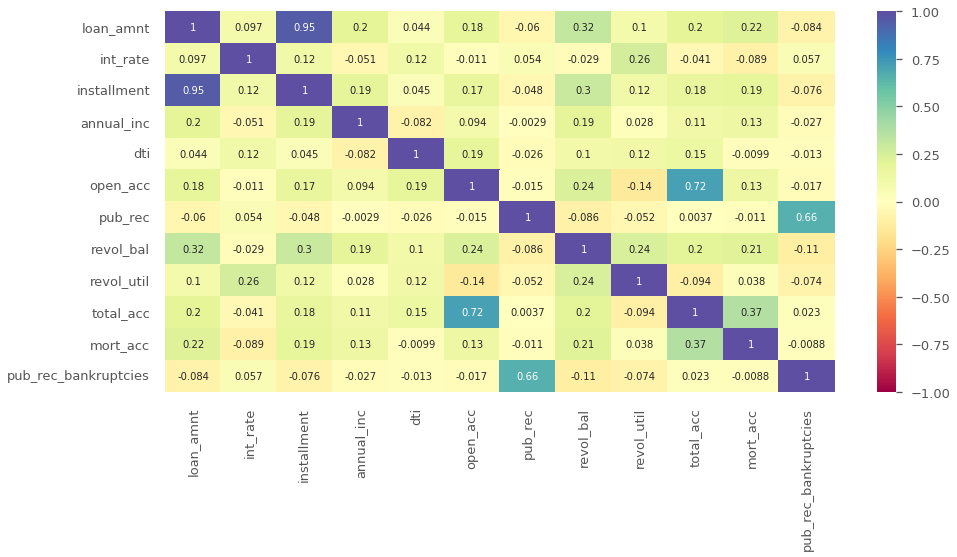

In [ ]:
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    plt.figure(figsize= (15,7))
    sns.heatmap(df.corr(), vmin=1, vmax=-1, annot=True, cmap="Spectral")

**We could notice almost perfect correlation with the "installment" feature. We want to make sure that weare not accidentaly leaking data from our features into our label, i.e. there is not a single feature that is a perfect predictor of the label because that basically indicates that it is not really a feature. To explore this further, we print out the descriptions of the features and perform a scatterplot between them.**

In [ ]:
feat_info('installment')

installment: The monthly payment owed by the borrower if the loan originates.


In [ ]:
feat_info('loan_amnt')

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


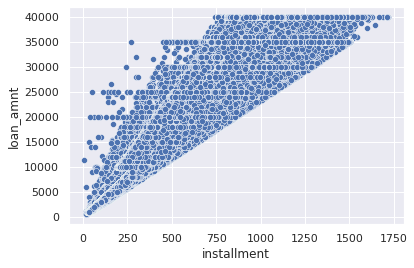

In [ ]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

We saw that the installment is the monthly payment owed by the borrower of the loan originates, and the loan amount is the limited amount of the loan applied by the borrower, so it pretty much makes sense that the installments and the actual loan amount would be extremely correlated because they are essentially correlated by some sort of formula that this company uses. If one loan someone out one million dollars you would expect that following some formula, your monthly installments are going to be quite high and they will probably use that same formula even if one loan someone a thousand dollars.

# Null Analysis & Processing
This step can be very time intensive depending on the approach 

Options are:
1. Use regression / classification techniques to find the missing values - ***very time intensive***
1. Imputation of null values with mean, median or mode
    * Use other features to group, then use impute mean,median, mode by grouping   - ***somewhat time intensive***
    
            i.e. to impute "revol_util", find the mean of "revol_util" groupby "purpose", then impute values based on grouping
            df.groupby("purpose")["revol_util"].mean()             

    * apply mean, median, mode across the whole column for imputation - ***least time intensive***
    

#DANIEL COMMENT:

**Guys, I am not sure if we are dealing with some missing values the best way we can.** Let me give you an example:

Note what "mort_acc" represents

In [ ]:
feat_info('mort_acc')

mort_acc: Number of mortgage accounts.


In [ ]:
df['mort_acc'].value_counts()

0.0     913133
1.0     386876
2.0     321245
3.0     227999
4.0     148195
5.0      85723
6.0      46346
7.0      23199
8.0      11339
9.0       5682
10.0      2880
11.0      1531
12.0       807
13.0       464
14.0       309
15.0       174
16.0       125
17.0        87
18.0        64
19.0        37
20.0        33
23.0        20
22.0        19
24.0        19
21.0        17
25.0        12
27.0         8
26.0         6
28.0         6
29.0         4
31.0         4
30.0         3
32.0         3
34.0         3
37.0         2
51.0         1
47.0         1
61.0         1
52.0         1
45.0         1
46.0         1
33.0         1
41.0         1
36.0         1
35.0         1
94.0         1
87.0         1
Name: mort_acc, dtype: int64

In [ ]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.089497
pub_rec                -0.011276
dti                    -0.009933
pub_rec_bankruptcies   -0.008817
revol_util              0.037845
open_acc                0.134263
annual_inc              0.134505
installment             0.185520
revol_bal               0.213212
loan_amnt               0.219976
total_acc               0.367956
mort_acc                1.000000
Name: mort_acc, dtype: float64

**GUYS: Note that the total_acc feature correlates with the mort_acc. One nice option I saw on internet is to group the dataframe by the total_acc and calculate the mean value for the mort_acc BUT per total_acc entry**

However, to avoid errors "total_acc" can note have nan values.

In [ ]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               163774
emp_length              144020
home_ownership               0
annual_inc                   4
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    22872
addr_state                   0
dti                       1673
earliest_cr_line            29
open_acc                    29
pub_rec                     29
revol_bal                    0
revol_util                1764
total_acc                   29
initial_list_status          0
application_type             0
mort_acc                 50030
pub_rec_bankruptcies      1365
dtype: int64

They are just 29 out of 2260701. So we can just drop those rows.

In [ ]:
df = df.dropna(subset=['total_acc'])

In [ ]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [ ]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [ ]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [ ]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               163762
emp_length              144020
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    22872
addr_state                   0
dti                       1673
earliest_cr_line             0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                1735
total_acc                    0
initial_list_status          0
application_type             0
mort_acc                    21
pub_rec_bankruptcies      1336
dtype: int64

#END COMMENT

#### To save time we will go with the easiest method, but first lets some quick analysis

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

emp_title               163762
emp_length              144020
title                    22872
dti                       1673
revol_util                1735
mort_acc                    21
pub_rec_bankruptcies      1336
dtype: int64

Text(0.5, 1.0, 'Heatmap of blank values')

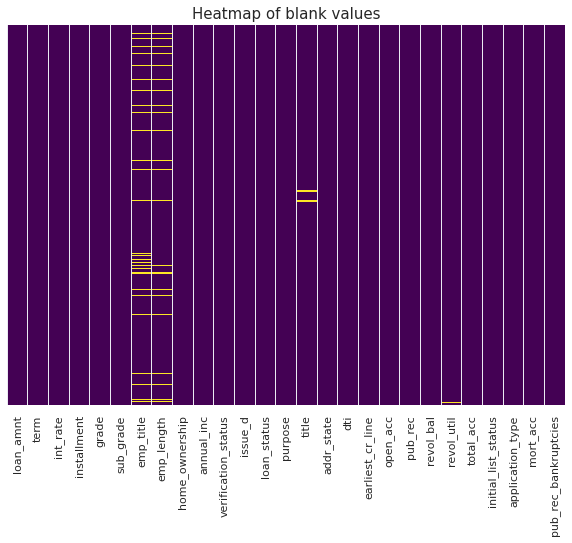

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.isnull(), cmap = "viridis",  cbar=False, yticklabels=False)
plt.title("Heatmap of blank values",fontsize =15)

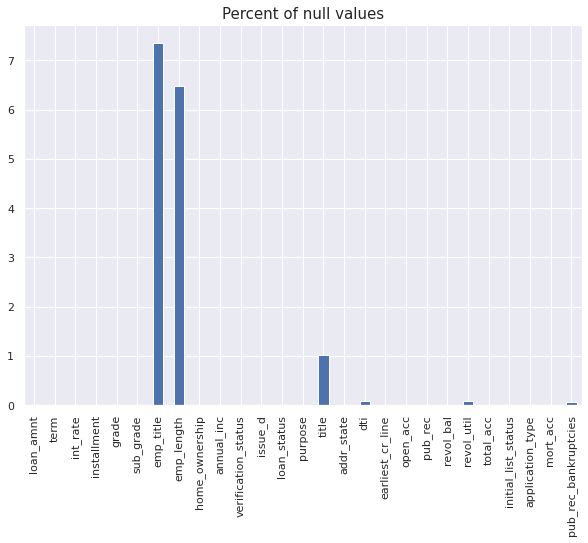

In [ ]:
((df.isnull().sum()/len(df))*100).plot(kind = "bar", figsize = (10,7))
plt.title("Percent of null values",fontsize= 15)
plt.show()

# Imputation
#### Notes: 

* Numerical vals  impute with mean 
* categorical vals imputewith model 

*** We can ignore title & emp_length as we will drop these features ***

In [ ]:
imputer_mean = SimpleImputer() #mean imputation
imputer_mode = SimpleImputer(strategy="most_frequent")

## mean 
* annual_inc
* dti
* open_acc
* pub_rec
* revol_util
* total_acc
* mort_acc
* pub_rec_bankruptcies
## mode
* emp_title
* "earliest_cr_line"    ---Date

In [ ]:
## Reset index for concat 
df = df.reset_index(drop = True)

In [ ]:
mode_impute = ["emp_title","earliest_cr_line"]
mean_impute = ["annual_inc","dti","open_acc","pub_rec","revol_util","total_acc","mort_acc","pub_rec_bankruptcies"]

In [ ]:
mean_df = pd.DataFrame(data = imputer_mean.fit_transform(df[mean_impute]), columns = mean_impute)

In [ ]:
df.drop(mean_impute,axis = 1,inplace =True)

In [ ]:
df = pd.concat([df,mean_df],axis =1)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,addr_state,earliest_cr_line,revol_bal,initial_list_status,application_type,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,Not Verified,2015-12-01,Paid,debt_consolidation,Debt consolidation,PA,2003-08-01,2765.0,w,Individual,55000.0,5.91,7.0,0.0,29.7,13.0,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,2015-12-01,Paid,small_business,Business,SD,1999-12-01,21470.0,w,Individual,65000.0,16.06,22.0,0.0,19.2,38.0,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,2015-12-01,Paid,home_improvement,NaN,IL,2000-08-01,7869.0,w,Joint App,63000.0,10.78,6.0,0.0,56.2,18.0,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,Source Verified,2015-12-01,Paid,debt_consolidation,Debt consolidation,NJ,2008-09-01,7802.0,w,Individual,110000.0,17.06,13.0,0.0,11.6,17.0,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,2015-12-01,Paid,major_purchase,Major purchase,PA,1998-06-01,21929.0,w,Individual,104433.0,25.37,12.0,0.0,64.5,35.0,6.0,0.0


In [ ]:
df["emp_length"].fillna(df["emp_length"].mode()[0], inplace = True)
df["earliest_cr_line"].fillna(df["earliest_cr_line"].mode()[0],inplace = True)

In [ ]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title               163762
emp_length                   0
home_ownership               0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                    22872
addr_state                   0
earliest_cr_line             0
revol_bal                    0
initial_list_status          0
application_type             0
annual_inc                   0
dti                          0
open_acc                     0
pub_rec                      0
revol_util                   0
total_acc                    0
mort_acc                     0
pub_rec_bankruptcies         0
dtype: int64

## Drop 
* emp_title
* title
* grade

In [ ]:
# too many unique values 
df.drop("emp_title",axis =1, inplace = True)

# title is the same as "purpose" we can therefore drop this column
df.drop("title",axis =1, inplace = True)

## grade holds the same information as subgrade
df.drop("grade",axis =1, inplace = True)

# Feature Engineering 
as per above 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr">Change</th>
    <th class="tg-fymr">Column</th>
    <th class="tg-fymr">Comment</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky" rowspan="7">Dummies<br><br></td>
    <td class="tg-0pky">home_ownership</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">verification_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">purpose</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">initial_list_status</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">application_type</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">sub grade</td>
    <td class="tg-0pky">Potentially ordinal but too many values</td>
  </tr>
  <tr>
    <td class="tg-0lax">addr_state</td>
    <td class="tg-0lax"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Numerical conversion </td>
    <td class="tg-0pky">emp_length</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">term</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Drop</td>
    <td class="tg-0pky">emp title</td>
    <td class="tg-0pky">Due to the number of unique values</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">title</td>
    <td class="tg-0pky">Duplicate of Purpose</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">grade</td>
    <td class="tg-0pky">Duplicate information as in subgrade</td>
  </tr>
  <tr>
    <td class="tg-0pky">Date</td>
    <td class="tg-0pky">issue_d</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
  <tr>
    <td class="tg-0pky"></td>
    <td class="tg-0pky">earliest_cr_line</td>
    <td class="tg-0pky">get month and year</td>
  </tr>
</tbody>
</table>

## Convert to numerical


In [ ]:
df["term"] = df["term"].apply(lambda x : x[:3]).astype(int)
print(df["term"].value_counts())

36    1589872
60     636515
Name: term, dtype: int64


In [ ]:
df["emp_length"].value_counts()

10+ years    881420
2 years      200530
< 1 year     186739
3 years      177935
1 year       146113
5 years      137572
4 years      134393
6 years      101129
7 years       91492
8 years       90682
9 years       78382
Name: emp_length, dtype: int64

In [ ]:
replace_dictionary = {"< 1 year":"1 years" }
df["emp_length"].replace(replace_dictionary,inplace=True)

In [ ]:
df["emp_length"] =df["emp_length"].apply(lambda x: x[:2]).astype(int)

## Dummies
Convert all categorical (non-ordinal) features into dummy columns including the target column 

In [ ]:
## Target to dummies 
df["loan_status"] = df["loan_status"].map({"Paid":0,"Default":1})

In [ ]:
df["home_ownership"].value_counts()

MORTGAGE    1096153
RENT         880163
OWN          248868
ANY             971
OTHER           182
NONE             50
Name: home_ownership, dtype: int64

In [ ]:
# lets group None and Any --> Other
df["home_ownership"]= df["home_ownership"].replace(["ANY","NONE"], "OTHER")

In [ ]:
dummy_cols = [ "home_ownership", "verification_status", "purpose","initial_list_status", "application_type","sub_grade", "addr_state"]


In [ ]:
#get dummy columns
df_dummies = pd.get_dummies(df[dummy_cols], drop_first=True)

#drop from original dataframe
df.drop(dummy_cols,axis =1, inplace=True)

In [ ]:
df= pd.concat([df,df_dummies],axis =1)

## Date Processing 
We can extract the year, month and day values from the two columns 
* issue_d  ---- date loan was issued 
* earliest_cr_line --- earliest credit line month

### Note:
**issue_d** should be dropped as this tells us that the loan was already issued, we want to understand if a loan has defaulted **before** a loan is issued
This is therefore data leakage and issue_d should be dropped 

In [ ]:
df.drop("issue_d",axis =1, inplace=True)

In [ ]:
print(df["earliest_cr_line"].value_counts())

2004-09-01    15155
2003-09-01    15004
2005-09-01    14494
2003-08-01    14432
2001-08-01    14175
              ...  
1952-11-01        1
1955-11-01        1
1954-10-01        1
1946-01-01        1
1957-08-01        1
Name: earliest_cr_line, Length: 754, dtype: int64


We can ignore the day value as this is only the first

In [ ]:
# extract year column 
df["year_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.year

#extract month column 
df["month_earliest"] = pd.to_datetime(df["earliest_cr_line"]).dt.month

#drop old column as we dont it now
df.drop(["earliest_cr_line"],axis=1, inplace=True)

In [ ]:
df.iloc[:,:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226387 entries, 0 to 2226386
Data columns (total 20 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   loan_amnt                            float64
 1   term                                 int64  
 2   int_rate                             float64
 3   installment                          float64
 4   emp_length                           int64  
 5   loan_status                          int64  
 6   revol_bal                            float64
 7   annual_inc                           float64
 8   dti                                  float64
 9   open_acc                             float64
 10  pub_rec                              float64
 11  revol_util                           float64
 12  total_acc                            float64
 13  mort_acc                             float64
 14  pub_rec_bankruptcies                 float64
 15  home_ownership_OTHER            

# Split 

In [ ]:
####################### ------- DELETE ------FOR Testing only ##########3
#df = df.sample(n= 100000, random_state = 42)


##################################### DELETE #################3

df["loan_status"].value_counts()

0    1957030
1     269357
Name: loan_status, dtype: int64

In [ ]:
X = df.drop("loan_status",axis =1 )
y= df["loan_status"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scaling 

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# we only transform X_test to stop any leakage 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.08860759, 0.        , 0.12266355, ..., 0.        , 0.80487805,
        0.18181818],
       [0.29810127, 1.        , 0.28738318, ..., 0.        , 0.92682927,
        0.36363636],
       [0.36708861, 0.        , 0.32554517, ..., 0.        , 0.87804878,
        0.54545455],
       ...,
       [0.59493671, 1.        , 0.28738318, ..., 0.        , 0.82926829,
        0.45454545],
       [0.11392405, 0.        , 0.33800623, ..., 0.        , 0.93902439,
        0.90909091],
       [0.11392405, 0.        , 0.49376947, ..., 0.        , 0.76829268,
        0.72727273]])

#Artificial Neural Network

We start by creating a model from scratch, in order to compare with the next models. We build a sequential model that goes 78 --> 39 --> 19--> 1 output neuron. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Epoch 1/25
5827/5827 [==============================] - 36s 6ms/step - loss: 0.3484 - val_loss: 0.3369
Epoch 2/25
5827/5827 [==============================] - 38s 7ms/step - loss: 0.3391 - val_loss: 0.3353
Epoch 3/25
5827/5827 [==============================] - 37s 6ms/step - loss: 0.3371 - val_loss: 0.3342
Epoch 4/25
5827/5827 [==============================] - 33s 6ms/step - loss: 0.3356 - val_loss: 0.3331
Epoch 5/25
5827/5827 [==============================] - 33s 6ms/step - loss: 0.3345 - val_loss: 0.3325
Epoch 6/25
5827/5827 [==============================] - 37s 6ms/step - loss: 0.3338 - val_loss: 0.3322
Epoch 7/25
5827/5827 [==============================] - 37s 6ms/step - loss: 0.3333 - val_loss: 0.3310
Epoch 8/25
5827/5827 [==============================] - 34s 6ms/step - loss: 0.3327 - val_loss: 0.3308
Epoch 9/25
5827/5827 [==============================] - 34s 6ms/step - loss: 0.3324 - val_loss: 0.3302
Epoch 10/25
5827/5827 [==============================] - 38s 7ms/step - l

Now we save our model for the API deployment.

In [ ]:
from tensorflow.keras.models import load_model
model.save('ANN_model.h5')  

It is time to evaluate our model performance. First, we plot out the validation loss versus the training loss.

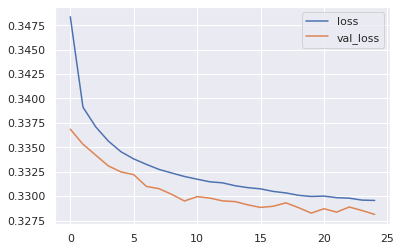

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

Now we create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x = model.predict(X_test)
predictions=np.argmax(predict_x,axis=-1)
print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94    645953
           1       0.00      0.00      0.00     88755

    accuracy                           0.88    734708
   macro avg       0.44      0.50      0.47    734708
weighted avg       0.77      0.88      0.82    734708



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(y_test,predictions)

array([[645953,      0],
       [ 88755,      0]])

# TPU Setup 
https://www.kaggle.com/docs/tpu

In [ ]:
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.7.0


BaseException: ignored

# Deep learning  - Multilayer Perceptons

## Base model
We will use a basic model with dropout layers (to reduce overfitting). We can then look changing the bias/ threshold due to the imbalanced dataset

In [ ]:
EPOCHS = 100
BATCH_SIZE = 16 * tpu_strategy.num_replicas_in_sync

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='min')

step_epoch = len(df)/BATCH_SIZE

NameError: ignored

In [ ]:
X_train.shape

(1491698, 120)

# XGBoost RandomForest Logistic regression

In [ ]:
from xgboost import XGBClassifier
xgbc=XGBClassifier(scale_pos_weight=10)
param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}
clf = BayesSearchCV(estimator=xgbc, search_spaces=param_grid,cv=3, return_train_score=True, verbose=3)
clf.fit(X_train, y_train)

#results dataframe
df = pd.DataFrame(clf.cv_results_)
    
#predictions - inputs to confusion matrix
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
unseen_predictions = clf.predict(df_test.iloc[:,1:])
    
#confusion matrices
cfm_train = confusion_matrix(y_train, train_predictions)
cfm_test = confusion_matrix(y_test, test_predictions)
cfm_unseen = confusion_matrix(df_test.iloc[:,:1], unseen_predictions)
    
#accuracy scores
accs_train = accuracy_score(y_train, train_predictions)
accs_test = accuracy_score(y_test, test_predictions)
accs_unseen = accuracy_score(df_test.iloc[:,:1], unseen_predictions)
    
#F1 scores for each train/test label
f1s_train_p1 = f1_score(y_train, train_predictions, pos_label=1)
f1s_train_p0 = f1_score(y_train, train_predictions, pos_label=0)
f1s_test_p1 = f1_score(y_test, test_predictions, pos_label=1)
f1s_test_p0 = f1_score(y_test, test_predictions, pos_label=0)
#f1s_unseen_p1 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=1)
#f1s_unseen_p0 = f1_score(df_test.iloc[:,:1], unseen_predictions, pos_label=0)
    
#Area Under the Receiver Operating Characteristic Curve
test_ras = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
unseen_ras = roc_auc_score(df_test.iloc[:,:1], clf.predict_proba(df_test.iloc[:,1:])[:,1])
    
#best parameters
bp = clf.best_params_
    
#storing computed values in results dictionary
results_dict = {'classifier': deepcopy(clf),
                            'cv_results': df.copy(),
                            'cfm_train': cfm_train,
                            'cfm_test': cfm_test,
                            'cfm_unseen': cfm_unseen,
                            'train_accuracy': accs_train,
                            'test_accuracy': accs_test,
                            'unseen_accuracy': accs_unseen,
                            'train F1-score label 1': f1s_train_p1,
                            'train F1-score label 0': f1s_train_p0,
                            'test F1-score label 1': f1s_test_p1,
                            'test F1-score label 0': f1s_test_p0,
                            'unseen F1-score label 1': f1s_unseen_p1,
                            'unseen F1-score label 0': f1s_unseen_p0,
                            'test roc auc score': test_ras,
                            'unseen roc auc score': unseen_ras,
                            'best_params': bp}
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    plot_roc_curve(clf,X_test,y_test)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.737646003604877

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
clf1 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
clf1.fit(X_train,y_train)
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    plot_roc_curve(clf,X_test,y_test)
clf2 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)   
clf2.fit(X_res,y_res)
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    plot_roc_curve(clf2,X_test,y_test)

NameError: name 'plot_roc_curve' is not defined

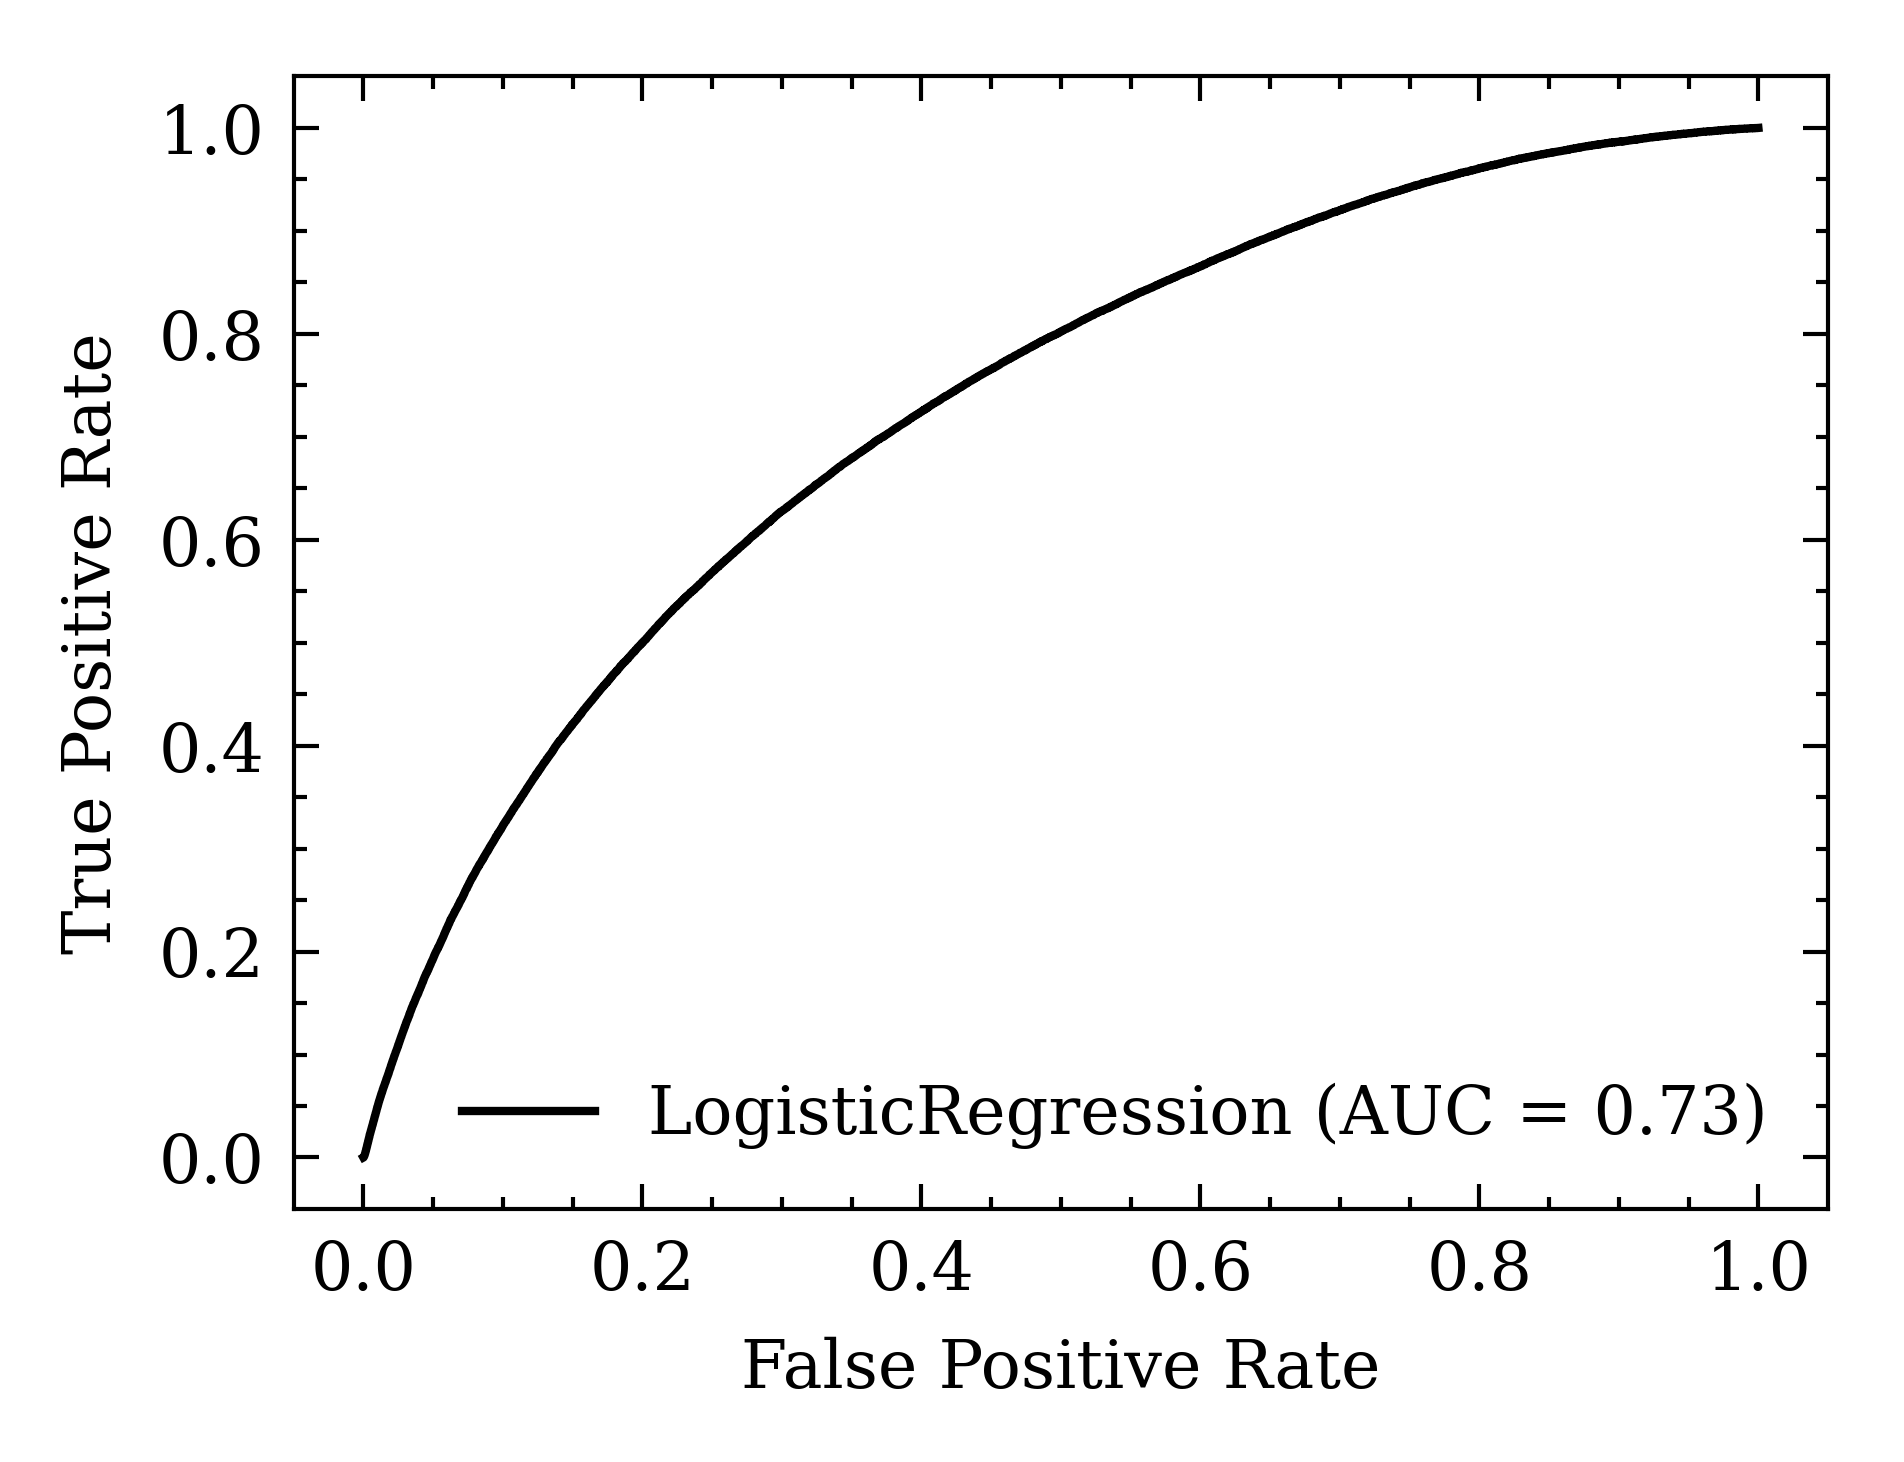

In [ ]:
clf2 =LogisticRegression(random_state=0,class_weight='balanced',penalty='elasticnet',solver='saga',l1_ratio=0.1,max_iter=10000)   
clf2.fit(X_res,y_res)
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    plot_roc_curve(clf2,X_test,y_test)

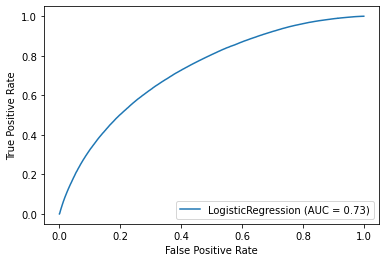

In [ ]:
plot_roc_curve(clf1, X_test, y_test) 

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn import metrics

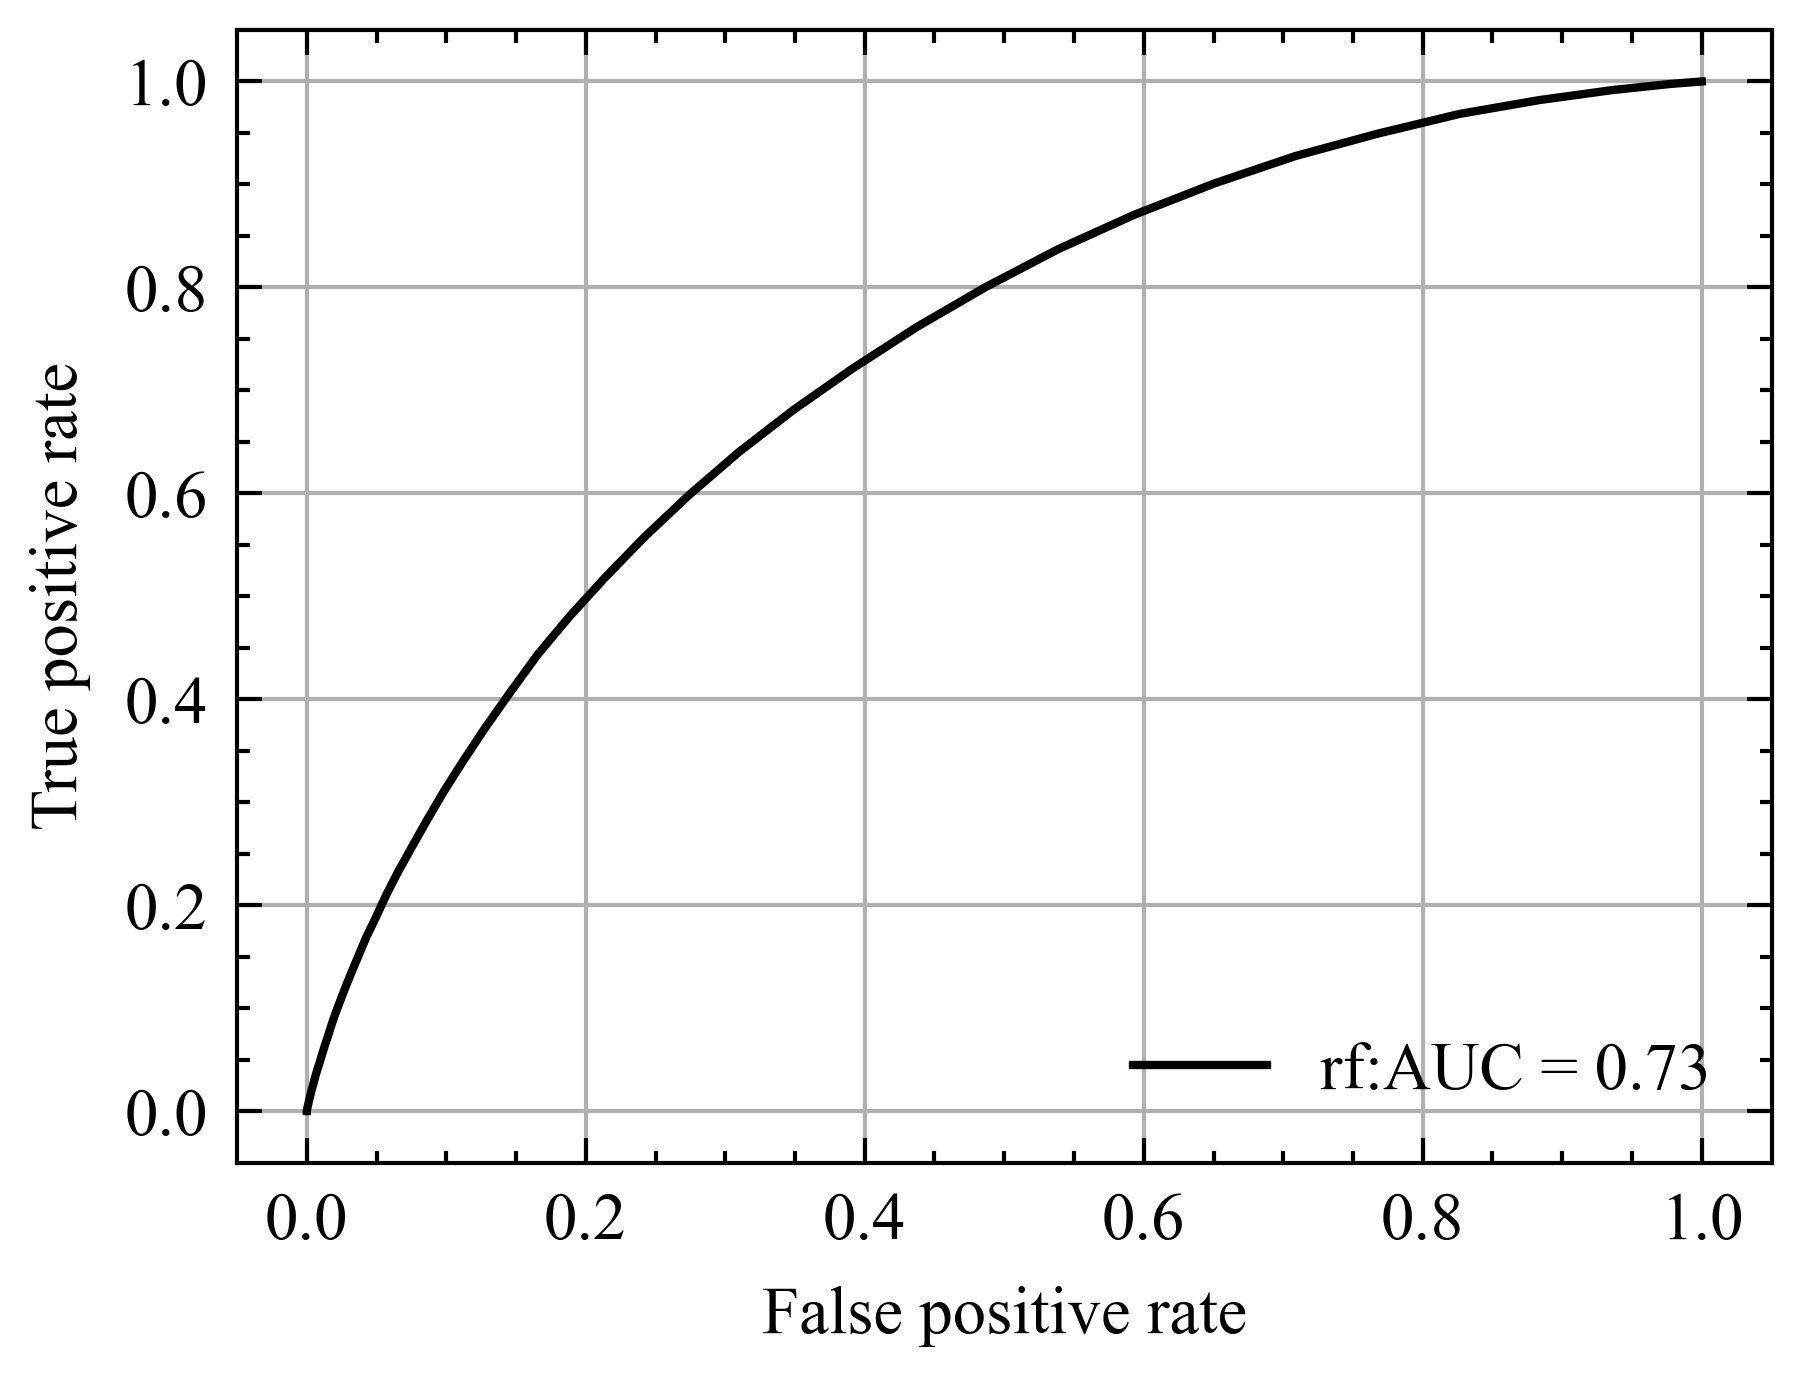

In [ ]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, clf.predict_proba(X_test)[:,1])
with plt.style.context(['ggplot','seaborn-bright','seaborn-talk']):
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label = 'rf:AUC = %0.2f' % roc_auc)
    plt.grid()
    #plt.title('ROC Curve of RuleFit',fontsize=5)
    plt.legend(loc = 'lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

In [ ]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94    645909
           1       0.47      0.01      0.01     88809

    accuracy                           0.88    734718
   macro avg       0.67      0.50      0.47    734718
weighted avg       0.83      0.88      0.82    734718



In [ ]:
METRICS = [
     # tf.keras.metrics.TruePositives(name='tp'),
      #tf.keras.metrics.FalsePositives(name='fp'),
      #tf.keras.metrics.TrueNegatives(name='tn'),
      #tf.keras.metrics.FalseNegatives(name='fn'), 
      #tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      #tf.keras.metrics.Precision(name='precision'),
      #tf.keras.metrics.Recall(name='recall'),
      #tf.keras.metrics.AUC(name='auc'),
      #tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

### Number of Layers and neurons 
As a general rule of thumb
* The number of inital neurons in the ***first layer***= total number of features or less 
* The number of inital neurons in the ***second layer***= approx. half of the number of features
* The number of hiden layers is 2 
This is what we will start with but can be changed in future runs 

In [ ]:
df.shape

In [ ]:
def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(120, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(60, activation='relu'),
      tf.keras.layers.Dropout(0.5),
      
      tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU
  model = make_model()

# train model normally
model.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

In [ ]:
model.summary()

# Model Evaluation 

We note that the classes are imbalanced, there are very few Default loans. 

In [ ]:
neg  = df["loan_status"].value_counts()[0]
pos = df["loan_status"].value_counts()[1]

print("% of False:",neg/ len(df))
print("% of True:",pos / len(df))

We need to beat an accuracy of 87% \
i.e. a model that only notes False (not Paid) 

In [ ]:
history = pd.DataFrame(data = model.history.history)

## Plot the loss of the traing and test set 
history.plot()

In [ ]:
print( "best epoch: ", history["val_loss"].argmin() )

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

### Poor performance 
87% accuracy as seen above is not ideal, as this is showing that the model may only be labelling most things FALSE
We can also see this via the F1 score for 1 (positive) of 0.0, which is very poor 

# New bias model 

In [ ]:
initial_bias = np.log([pos/neg])
initial_bias

In [ ]:
with tpu_strategy.scope(): 
  model_bias = make_model(output_bias=initial_bias)

# train model normally
model_bias.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping)

In [ ]:
history_bias = pd.DataFrame(data = model_bias.history.history)

history_bias[["loss","val_loss"]].plot()

In [ ]:
model_bias.evaluate(X_test,y_test)

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_bias.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )

# New Weighted model 
*The goal is to identify fraudulent transactions, but you don't have very many of those positive samples to work with, so you would want to have the classifier heavily weight the few examples that are available. You can do this by passing Keras weights for each class through a parameter. These will cause the model to "pay more attention" to examples from an under-represented class.*


***Note***: Scaling by len(df)/2 helps keep the loss to a similar magnitude.\
***Note***: The sum of the weights of all examples stays the same.

In [ ]:
weight_for_0 = (1 / neg) * (len(df) / 2.0)
weight_for_1 = (1 / pos) * (len(df) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

In [ ]:
with tpu_strategy.scope(): 
  model_weighted = make_model(output_bias=initial_bias)

## note the class weight 
model_weighted.fit(X_train,y_train, epochs=EPOCHS, batch_size = BATCH_SIZE, validation_data=(X_test,y_test), callbacks = early_stopping
                  ,class_weight=class_weight)

In [ ]:
history_weighted = pd.DataFrame(data = model_weighted.history.history)

## Plot the loss of the traing and test set 
history_weighted.plot()

In [ ]:
model_weighted.evaluate(X_test,y_test)

In [ ]:
history_weighted["val_loss"].argmin()

In [ ]:
# Note - predict_classes was deprecated as of tensorflow 2.6 
y_pred = model_weighted.predict(X_test)
y_pred = (y_pred > 0.5).astype("int32")

print( accuracy_score(y_test,y_pred) )

print( classification_report(y_test,y_pred) )